# $\color{blue}{\text{End Of Course Project }}$
## $\color{blue}{\text{Group AU  }}$

### Present:
#### Aviv Hatav 209236942
#### Shoval Ridi 208109504
#### Ariel Hezi 314994716

## $\color{blue}{\text{Project Subject:}}$  Stock market indices in Israel and the United States, Number of coronavirus infections in the US And their effects on each other

<div>
<img src="https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/Images/Stock.jpg" width="500"/>
</div>


#  

## $\color{blue}{\text{Arranging the information}}$

#### Imports of python libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#### Create a help table for synchronized dates


In [79]:
date_range = pd.date_range(start = "21.04.2020", end = '19.04.2021' ,freq = 'D')
date_range_df = pd.DataFrame({'Date':date_range})
date_range_df = date_range_df["Date"].dt.strftime("%d.%m.%Y")
date_range_df = pd.DataFrame(date_range_df)
date_range_df.head(3)

,Date
0,21.04.2020
1,22.04.2020
2,23.04.2020


#### Reading CSV files: 

##### 1. Corona disease file

In [80]:
url1 = 'https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/case_daily_trends__united_states.csv'
Corona = pd.read_csv(url1)
Corona.head(2)

,Date,New Cases,7-Day Moving Avg
0,19.04.2021,43863,66687
1,18.04.2021,54442,68602


##### 2. Nasdaq stock file

In [81]:
url2 = 'https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/%D7%A0%D7%90%D7%A1%D7%93_%D7%A7%20-%20%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D%20%D7%94%D7%99%D7%A1%D7%98%D7%95%D7%A8%D7%99%D7%99%D7%9D.csv'
Nasdaq = pd.read_csv(url2)
url2 = 'https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/%D7%A0%D7%90%D7%A1%D7%93_%D7%A7%20-%20%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D%20%D7%94%D7%99%D7%A1%D7%98%D7%95%D7%A8%D7%99%D7%99%D7%9D.csv'
Nasdaq = Nasdaq.rename(columns={"תאריך": "Date", "שער" : "Gate_Nasdaq", "פתיחה": "Openning_Value_Nasdaq" , "גבוה": "High_Daily_Nasdaq" , "נמוך": "Low_Daily_Nasdaq", "נפח": "Volume_Capacity_Nasdaq", "שינוי %" : "Change%_Nasdaq" })
Nasdaq.head(2)

,Date,Gate_Nasdaq,Openning_Value_Nasdaq,High_Daily_Nasdaq,Low_Daily_Nasdaq,Volume_Capacity_Nasdaq,Change%_Nasdaq
0,21.04.2021,"13,876.88","13,745.83","13,893.90","13,707.08",415.77M,0.66%
1,20.04.2021,"13,786.27","13,894.46","13,927.67","13,698.67",875.27M,-0.92%


##### 3. Tel Aviv Stock File 125

In [82]:
url3 = 'https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/%D7%A0%D7%AA%D7%95%D7%A0%D7%99%20%D7%91%D7%95%D7%A8%D7%A1%D7%94%20%D7%AA%D7%9C%20%D7%90%D7%91%D7%99%D7%91%20125.csv'
TLV = pd.read_csv(url3)
TLV = TLV.rename(columns={"תאריך": "Date", "שער" : "Gate_TLV", "פתיחה": "Openning_Value_TLV" , "גבוה": "High_Daily_TLV" , "נמוך": "Low_Daily_TLV", "נפח": "Volume_Capacity_TLV", "שינוי %" : "Change%_TLV" })
TLV.head(2)

,Date,Gate_TLV,Openning_Value_TLV,High_Daily_TLV,Low_Daily_TLV,Volume_Capacity_TLV,Change%_TLV
0,21.04.2021,"1,692.91","1,691.69","1,694.97","1,684.35",51.51M,-0.29%
1,20.04.2021,"1,697.88","1,703.36","1,709.17","1,693.61",57.06M,-0.53%


#### Consolidation of the three cabins according to the date table

In [83]:
All_Data = pd.merge(date_range_df, Corona, how='inner', on='Date')
All_Data = pd.merge(All_Data, Nasdaq, how='inner', on='Date')
All_Data = pd.merge(All_Data, TLV, how='inner', on='Date')
All_Data['Date'] = pd.to_datetime(All_Data['Date'], format='%d.%m.%Y') 
All_Data.tail(2)

,Date,New Cases,7-Day Moving Avg,Gate_Nasdaq,Openning_Value_Nasdaq,High_Daily_Nasdaq,Low_Daily_Nasdaq,Volume_Capacity_Nasdaq,Change%_Nasdaq,Gate_TLV,Openning_Value_TLV,High_Daily_TLV,Low_Daily_TLV,Volume_Capacity_TLV,Change%_TLV
130,2021-04-13,76033,69880,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%,"1,697.27","1,698.62","1,701.65","1,691.84",55.09M,0.07%
131,2021-04-19,43863,66687,"13,914.76","13,984.58","14,041.79","13,842.57",907.06M,-0.98%,"1,706.97","1,708.57","1,714.95","1,703.96",68.09M,-0.24%


### Understanding the information

In [84]:
# We changed the str to int
All_Data['Low_Daily_Nasdaq'] = All_Data['Low_Daily_Nasdaq'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['High_Daily_Nasdaq'] =  All_Data['High_Daily_Nasdaq'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['Gate_Nasdaq'] = All_Data['Gate_Nasdaq'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['Openning_Value_Nasdaq'] = All_Data['Openning_Value_Nasdaq'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['Gate_TLV'] = All_Data['Gate_TLV'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['Openning_Value_TLV'] = All_Data['Openning_Value_TLV'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['Low_Daily_TLV'] = All_Data['Low_Daily_TLV'].replace({',':''},regex=True).apply(pd.to_numeric,1)
All_Data['High_Daily_TLV'] =  All_Data['High_Daily_TLV'].replace({',':''},regex=True).apply(pd.to_numeric,1)

In [85]:
# We removed the percentage mark and changed the str to int
All_Data['Change%_Nasdaq'] =  All_Data['Change%_Nasdaq'].replace({'%':''},regex=True).apply(pd.to_numeric,1)
All_Data['Change%_TLV'] =  All_Data['Change%_TLV'].replace({'%':''},regex=True).apply(pd.to_numeric,1)

#### Average between the columns of high and low values in each of the stocks

In [86]:
All_Data['Mean_Daily_Nasdaq'] = All_Data[['High_Daily_Nasdaq','Low_Daily_Nasdaq']].mean(axis = 1)
All_Data['Mean_Daily_TLV'] = All_Data[['High_Daily_TLV','Low_Daily_TLV']].mean(axis = 1)

#### 

# 
## $\color{blue}{\text{Data analysis}}$

In [106]:
Final_Data = All_Data[['Date','New Cases','7-Day Moving Avg','Gate_Nasdaq','Openning_Value_Nasdaq','Mean_Daily_Nasdaq','Volume_Capacity_Nasdaq','Change%_Nasdaq','Gate_TLV','Openning_Value_TLV','Mean_Daily_TLV','Volume_Capacity_TLV','Change%_TLV']]
Final_Data.head(2)

,Date,New Cases,7-Day Moving Avg,Gate_Nasdaq,Openning_Value_Nasdaq,Mean_Daily_Nasdaq,Volume_Capacity_Nasdaq,Change%_Nasdaq,Gate_TLV,Openning_Value_TLV,Mean_Daily_TLV,Volume_Capacity_TLV,Change%_TLV
0,2020-04-21,26053,28059,8263.23,8460.69,8347.990,881.56M,-3.48,1320.41,1347.93,1331.33,106.76M,-2.18
1,2020-04-22,26719,27966,8495.38,8434.55,8470.925,733.43M,2.81,1322.14,1323.80,1324.47,94.24M,0.13


In [88]:
# We chose to use the command df.describe() to get a general picture of the data we are about to deal with 
Final_Data.describe()

,New Cases,7-Day Moving Avg,Gate_Nasdaq,Openning_Value_Nasdaq,Mean_Daily_Nasdaq,Change%_Nasdaq,Gate_TLV,Openning_Value_TLV,Mean_Daily_TLV,Change%_TLV
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,86391.696970,86203.712121,11655.698258,11663.956515,11652.819545,0.045076,1482.368712,1484.391894,1483.180265,-0.057121
std,65623.253449,65596.674763,1457.816317,1453.294213,1451.198373,1.352485,118.150919,117.716910,117.730419,1.088964
min,16564.000000,20781.000000,8263.230000,8434.550000,8347.990000,-3.730000,1304.540000,1307.570000,1305.350000,-4.580000
25%,40426.500000,42081.250000,10678.337500,10689.020000,10647.316250,-0.667500,1387.660000,1387.052500,1389.932500,-0.710000
50%,59460.000000,60884.000000,11535.175000,11545.855000,11570.910000,0.205000,1438.770000,1442.350000,1440.917500,-0.090000
75%,144854.750000,127431.000000,12992.367500,13018.795000,13007.990000,0.880000,1609.865000,1620.822500,1616.436250,0.670000
max,248776.000000,249233.000000,14047.500000,14152.210000,14085.285000,2.810000,1706.970000,1708.570000,1709.455000,2.720000


## $\color{green}{\text{Observation:}}$
### כפי שניתן לראות בעמודות של הממוצע - הממוצע גבוה מהחציון דבר אשר מעיד כי אנחנו עומדים להתעסק עם נתונים שהחצי העליון של העמודה בעל קפיצות גבוהות יותר, על כן ככל הנראה לא נקבל קו לינארי, אלא קו בעל סטיה אקספוננציאלית. דבר העולה בקנה אחד עם סטיית התקן

 # 
  # 

## speculation:
#### The increase in the number of corona patients in the US will cause a decrease in stock market indices in the US and Israel

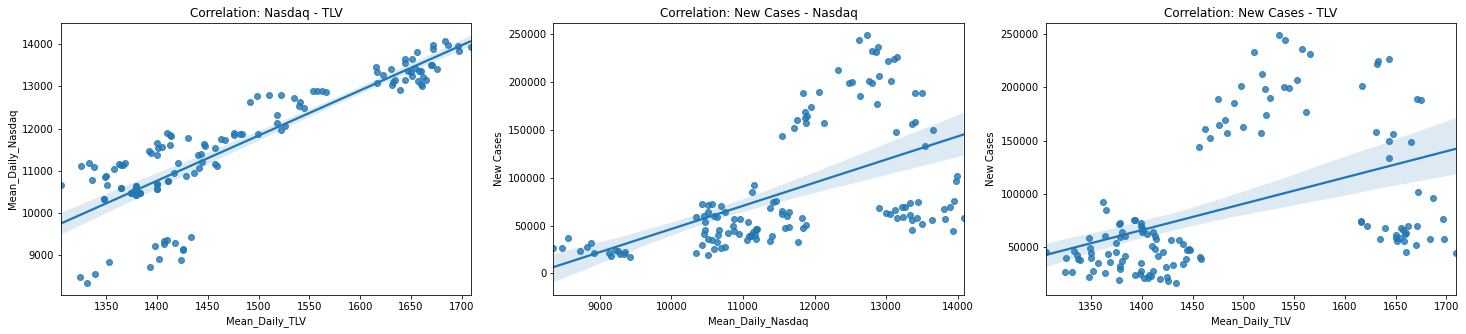

In [89]:
# We will examine the correlation between each pair of variables
fig, axes = plt.subplots(figsize=(25, 5), ncols=3)
sns.regplot(ax=axes[0], x='Mean_Daily_TLV', y='Mean_Daily_Nasdaq', data= Final_Data)
sns.regplot(ax=axes[1], x='Mean_Daily_Nasdaq', y='New Cases', data= Final_Data)
sns.regplot(ax=axes[2], x='Mean_Daily_TLV', y='New Cases', data= Final_Data)

axes[0].set_title("Correlation: Nasdaq - TLV")
axes[1].set_title("Correlation: New Cases - Nasdaq")
axes[2].set_title("Correlation: New Cases - TLV")

plt.show()

###### There seems to be a certain match - we would like to see numerically 

In [90]:
data1 = Final_Data[['Mean_Daily_TLV','Mean_Daily_Nasdaq','New Cases']]
data1.corr()

,Mean_Daily_TLV,Mean_Daily_Nasdaq,New Cases
Mean_Daily_TLV,1.000000,0.868527,0.442966
Mean_Daily_Nasdaq,0.868527,1.000000,0.534756
New Cases,0.442966,0.534756,1.000000


Text(0.5, 1.0, 'Heatmap')

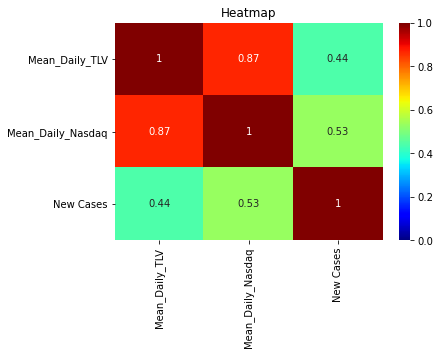

In [91]:
# create heatmap
sns.heatmap(data1.corr(), vmin=0.0 , vmax = 1, cmap='jet', annot=True)
plt.title("Heatmap")

## $\color{green}{\text{Observation:}}$
### As can be seen, there is a high match between the US and Israeli stock exchanges.

##### If so, when we look at the correlation between the number of corona virus infections in the US and the US stock market, we will know how the number of infections affected the Israeli stock market as well.
##### From the initial analysis performed - it can be seen that there is a certain match between the US stock market and the number of those infected there, but this must be analyzed in a different and more in-depth way in order to get a real conclusion.
# 
# 

### Create one more table "Per_Month_Year" to help us analyze the data by month:

In [92]:
# Splitting the date into a month and a year will help us divide the table later
Final_Data = Final_Data.copy()
Final_Data["Per_Month_Year"] = pd.DatetimeIndex(Final_Data.Date).to_period("M")
Final_Data.head(2)

,Date,New Cases,7-Day Moving Avg,Gate_Nasdaq,Openning_Value_Nasdaq,Mean_Daily_Nasdaq,Volume_Capacity_Nasdaq,Change%_Nasdaq,Gate_TLV,Openning_Value_TLV,Mean_Daily_TLV,Volume_Capacity_TLV,Change%_TLV,Per_Month_Year
0,2020-04-21,26053,28059,8263.23,8460.69,8347.990,881.56M,-3.48,1320.41,1347.93,1331.33,106.76M,-2.18,2020-04
1,2020-04-22,26719,27966,8495.38,8434.55,8470.925,733.43M,2.81,1322.14,1323.80,1324.47,94.24M,0.13,2020-04


In [93]:
# Once we have arranged the dates, we will divide the information by months and make an average
Per_Month = Final_Data.groupby('Per_Month_Year', as_index=True).mean()
Per_Month

,New Cases,7-Day Moving Avg,Gate_Nasdaq,Openning_Value_Nasdaq,Mean_Daily_Nasdaq,Change%_Nasdaq,Gate_TLV,Openning_Value_TLV,Mean_Daily_TLV,Change%_TLV
Per_Month_Year,,,,,,,,,,
2020-04,29100.200000,28546.800000,8574.614000,8610.614000,8595.214000,0.030000,1357.044000,1366.784000,1362.321000,0.282000
2020-05,21588.700000,23206.900000,9183.495000,9200.690000,9184.819000,0.203000,1404.800000,1414.240000,1407.748500,-0.640000
2020-07,47576.500000,46801.090909,10545.458182,10564.303636,10542.418182,0.006364,1381.399091,1381.050909,1381.395909,0.298182
2020-08,44673.076923,47495.615385,11266.919231,11245.358462,11252.660385,0.459231,1437.493077,1440.210000,1439.325769,-0.160769
2020-09,41775.090909,40354.363636,10947.979091,10967.722727,10963.703182,-0.186364,1343.333636,1342.960000,1343.422273,-0.065455
2020-10,66965.666667,62487.000000,11515.798333,11545.827500,11537.405000,-0.275833,1395.846667,1399.875833,1397.236250,-0.388333
2020-11,165482.545455,155474.363636,11890.069091,11877.397273,11867.052727,0.234545,1487.928182,1487.137273,1488.048636,0.144545
2020-12,213434.692308,204863.153846,12730.619231,12711.656923,12710.485769,0.358462,1534.458462,1534.366154,1533.821923,0.034615
2021-01,181558.727273,200807.909091,13309.601818,13322.105455,13310.111364,0.172727,1648.120909,1644.236364,1645.498182,0.205455


# 

## We would like to check:
### Has an increase in the number of corona infections in the US caused a decrease in stock market indices? 

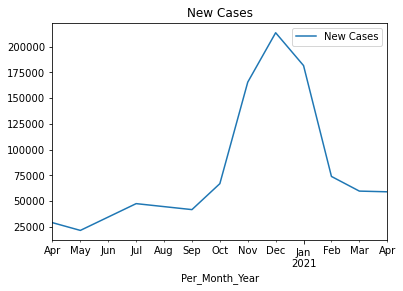

In [94]:
Per_Month[["New Cases"]].plot()
plt.title("New Cases")
plt.show()

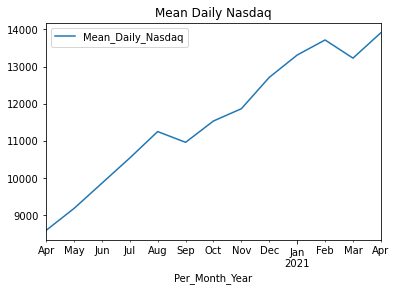

In [95]:
Per_Month[["Mean_Daily_Nasdaq"]].plot()
plt.title("Mean Daily Nasdaq")
plt.show()

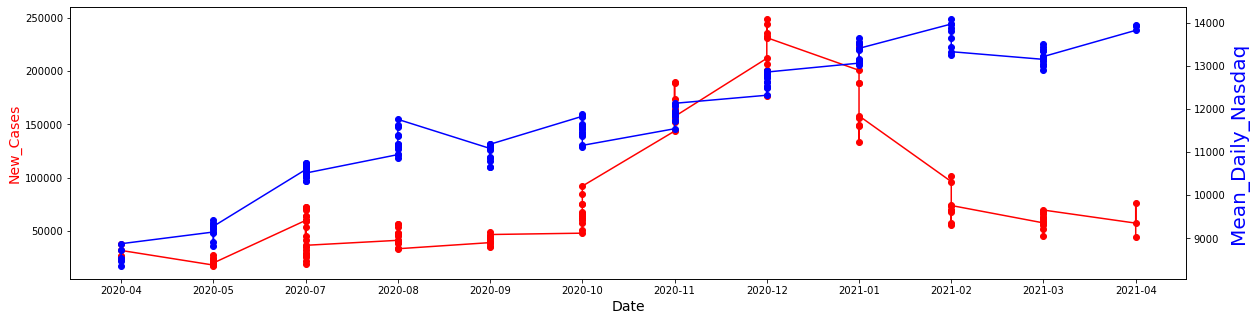

In [96]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 5))
# make a plot
ax.plot(Final_Data.Per_Month_Year.astype(str) , Final_Data['New Cases'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("New_Cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Final_Data.Per_Month_Year.astype(str) , Final_Data['Mean_Daily_Nasdaq'],color="blue",marker="o")
ax2.set_ylabel("Mean_Daily_Nasdaq",color="blue",fontsize=20)
plt.show()

### As noted earlier we expected to see a direct correlation between the number of corona infections in the US and stock market data there. 
### From the comparison between the graphs it can be seen that only the extreme bank of the graph "new cases" had an effect on the stock market indices in the US. At the end of the rise, there was an effect on the stock market indices that caused a slight decline and then the stock market moderated.
### Apart from these declines, the number of those affected has no significant impact on the US stock market.
### Therefore, our hypothesis was incorrect

## $\color{green}{\text{Observation:}}$
### The corona virus in the US did not cause a drop in US and Israeli stock market indices.

# 
# 


# So... if you invest the money, what do you expect to earn in each of the exchanges?

<div>
<img src="https://raw.githubusercontent.com/ArielHezi/DS_Stock_Exchange/main/Images/%E2%80%8F%E2%80%8FNoa_Kirel.jpg", width="500"/>
</div>


# $\color{blue}{\text{Forecasting stock market indices in the US and Israel through regression:}}$

## Nasdaq regression

In [97]:
Per_Month.shape

(12, 10)

In [98]:
from sklearn import linear_model

X = np.linspace(1,12, num=12).reshape(-1, 1)
y = Per_Month['Mean_Daily_Nasdaq']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print("R^^2 = ",regr.score(X,y))

R^^2 =  0.9364366275248687


In [99]:
# X point
regr.coef_

array([464.7256354])

In [100]:
# Y point
regr.intercept_

8713.99141600151

### The regression equation:
## Y = 464.726X + 8714
### 

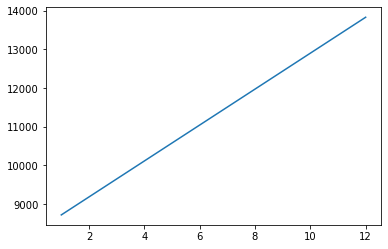

In [101]:
y = []
for i in range(12):
    y.append(464.726*i + 8714)

X = np.linspace(1,12,12)
plt.plot(X,y)
plt.show()

## 
## TLV regression

In [102]:
from sklearn import linear_model

X = np.linspace(1,12, num=12).reshape(-1, 1)
y = Per_Month['Mean_Daily_TLV']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print("R^^2 = ",regr.score(X,y))

R^^2 =  0.8357261713633074


In [103]:
# X point
regr.coef_

array([33.36766009])

In [104]:
# Y point
regr.intercept_

1283.739211529632

### The regression equation:
## Y = 33.367X + 1283.739
### 

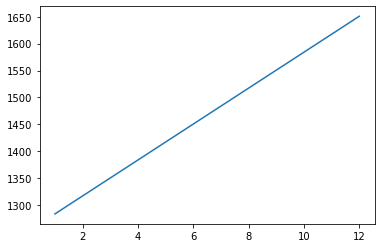

In [105]:
y = []
for i in range(12):
    y.append(33.367*i + 1283.739)

X = np.linspace(1,12,12)
plt.plot(X,y)
plt.show()

## $\color{green}{\text{Observation:}}$


## Expect to earn (Based on the slope of the graphs):

### If you invest money today in the US stock market your expected profit each month is about 464.726 Dollar per stock.
### If you invest in the Israel Stock Exchange, your expected profit each month is about 33.367 Shekel per stock.
### good luck to you :)

# 
# 
# $\color{blue}{\text{Thanks for listening}}$
